                                                                                                Michael Gonzalez
                                                                    Side Project with Python, Seaborn and Matplotlib

# Data Visualization of Pokemon Data with Python and Seaborn

## Importing the libraries and data (Pandas, Seaborn and Matplotlib)

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('C:\Users\gonzm200\Downloads\Pokemon.csv', index_col = 0)

df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Seaborn Plotting of Attacks and Defenses

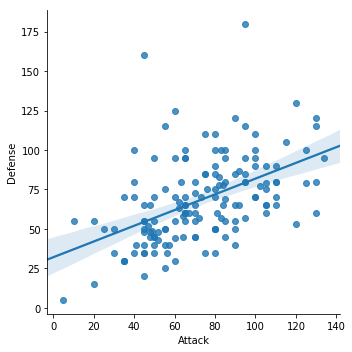

In [10]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df)

## Seaborn Scatter Plotting of Attack and Defenses

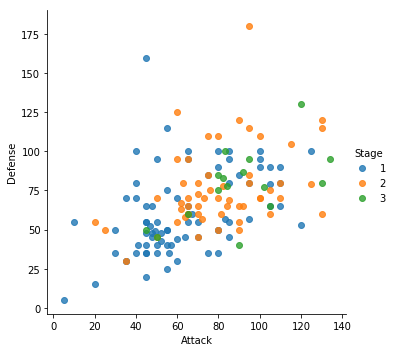

In [11]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
           fit_reg = False, # No regression line
           hue = 'Stage')   # Color by evolution stage

## Scatter Plotting with Seaborn and Matplotlib 

(0, 141.9881096001028)

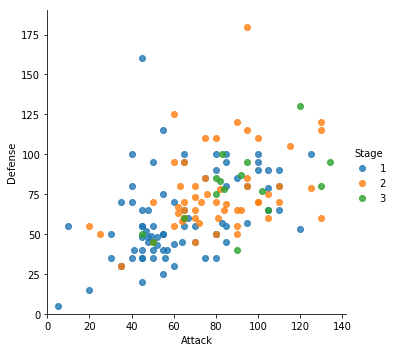

In [12]:
# Scatter Plot using Seaborn
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
           fit_reg = False, # No regression line
           hue = 'Stage')   # Color by evolution stage

# Adjusting with Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)


## Box Plots of Pokemon Data 

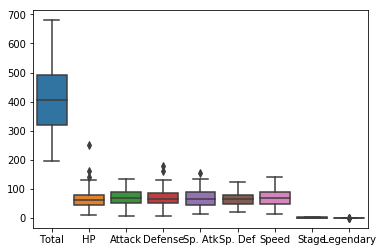

In [13]:
sns.boxplot(data = df)

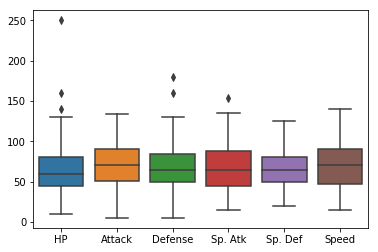

In [14]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)
 
# New boxplot using stats_df
sns.boxplot(data = stats_df)

## Using Seaborn Themes for Box Plots 

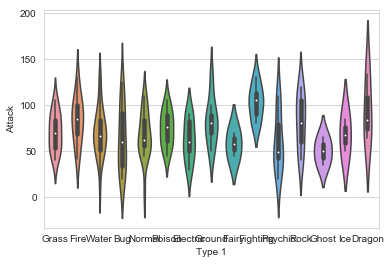

In [15]:
# Setting the theme
sns.set_style('whitegrid')
 
# Making the violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

## Using Custom Color Palettes 

In [16]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

## Custom Color Palette in Violin Plot

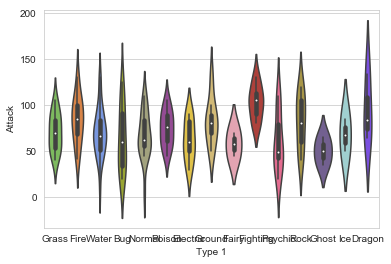

In [17]:
# Violin plot with Pokemon color palette
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, 
               palette = pkmn_type_colors) # Set color palette

## Creating a Swarm Plot with the Custom Colors 

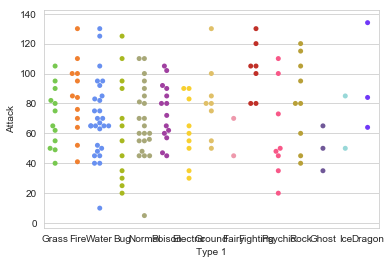

In [18]:
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, 
              palette = pkmn_type_colors)

## Creating a Plot with all the others 

Text(0.5,1,'Attack by Type')

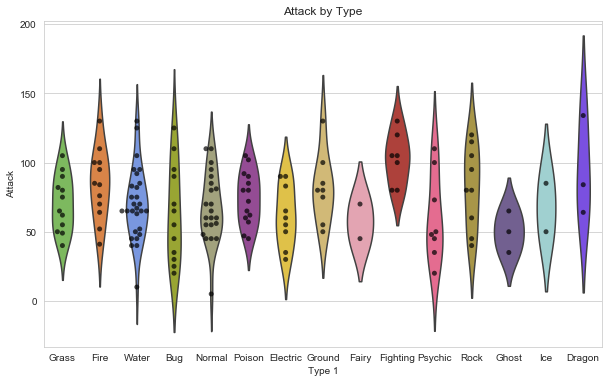

In [19]:
# Set figure size with matplotlib
plt.figure(figsize = (10,6))
 
# Create plot
sns.violinplot(x = 'Type 1',
               y = 'Attack', 
               data = df, 
               inner = None, # Remove the bars inside the violins
               palette = pkmn_type_colors)
 
sns.swarmplot(x = 'Type 1', 
              y = 'Attack', 
              data = df, 
              color = 'k', # Make points black
              alpha = 0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

## Data Wrangling for a New Data Frame 

In [20]:
melted_df = pd.melt(stats_df, 
                    id_vars = ["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name = "Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


## Creating a New Swarm Plot with the New Data Frame 

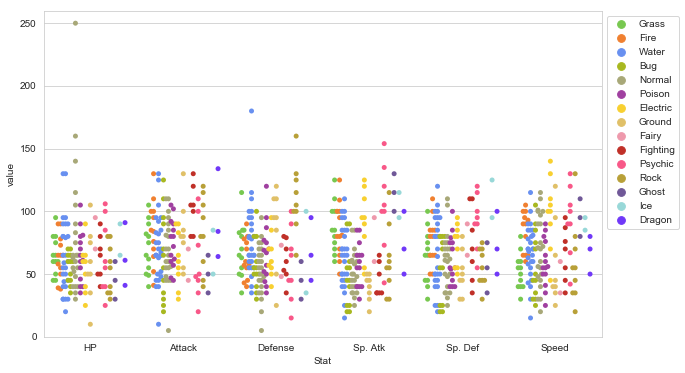

In [22]:
# 1. Making the plot bigger
plt.figure(figsize = (10,6))
 
sns.swarmplot(x = 'Stat', 
              y = 'value', 
              data = melted_df, 
              hue = 'Type 1', 
              dodge = True, # 2. Separate points by hue types
              palette = pkmn_type_colors) # 3. Use pokemon color palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor = (1, 1), loc = 2)

## Creating  a Heat Map of the Pokemon Data

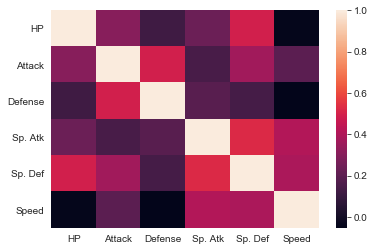

In [23]:
# Calculating any correlations
corr = stats_df.corr()
 
# Creating the Heat Map
sns.heatmap(corr)

## Creating a Histogram of Pokemon Data 

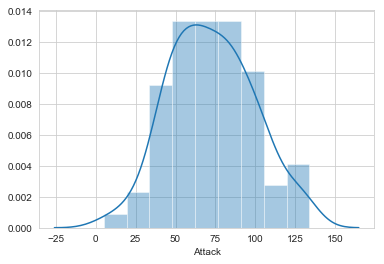

In [24]:
# Histogram of pokemon attacks
sns.distplot(df.Attack)

## Creating a Density Plot of Pokemon Data 

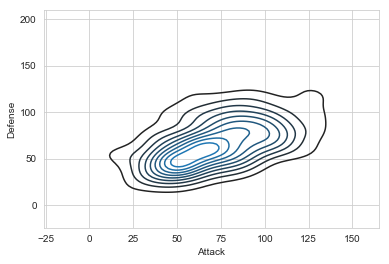

In [25]:
# Making a density plot of the pokemon data
sns.kdeplot(df.Attack, df.Defense)